In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Step One

In [35]:
# 'confirmed', 'deaths', 'recovered', 'recovery', 'mortality', 'contagion'
series_category = 'contagion'
history = pd.read_csv('output/step_one/'+series_category+'/' + 'history.csv', index_col=0)
median = pd.read_csv('output/step_one/'+series_category+'/' + 'prediction_median.csv', index_col=0)
# quantile10 = pd.read_csv('output/step_one/'+series_category+'/' + 'quantile10.csv', index_col=0)
# quantile90 = pd.read_csv('output/step_one/'+series_category+'/' + 'quantile90.csv', index_col=0)
quantile35 = pd.read_csv('output/step_one/'+series_category+'/' + 'prediction_lower.csv', index_col=0)
quantile65 = pd.read_csv('output/step_one/'+series_category+'/' + 'prediction_upper.csv', index_col=0)

history.index = pd.to_datetime(history.index)
median.index = pd.to_datetime(median.index)
# quantile10.index = pd.to_datetime(quantile10.index)
# quantile90.index = pd.to_datetime(quantile90.index)
quantile35.index = pd.to_datetime(quantile35.index)
quantile65.index = pd.to_datetime(quantile65.index)

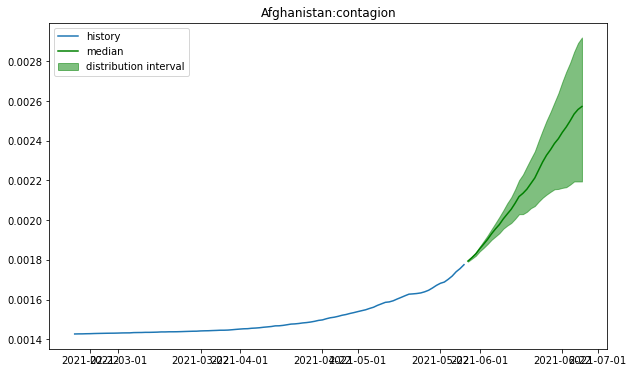

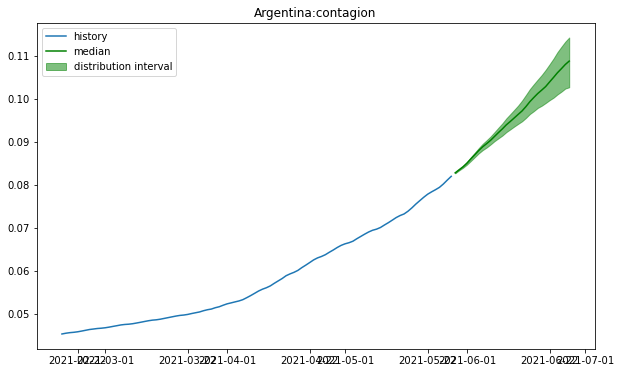

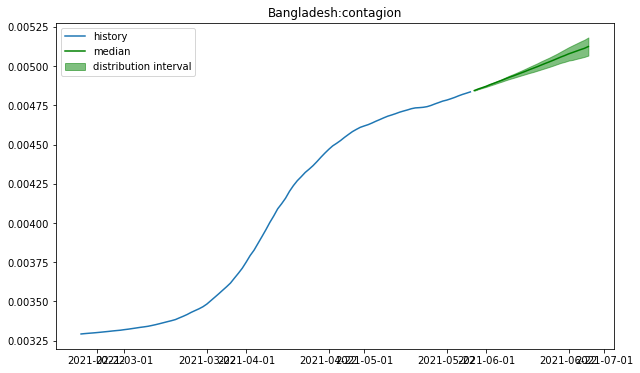

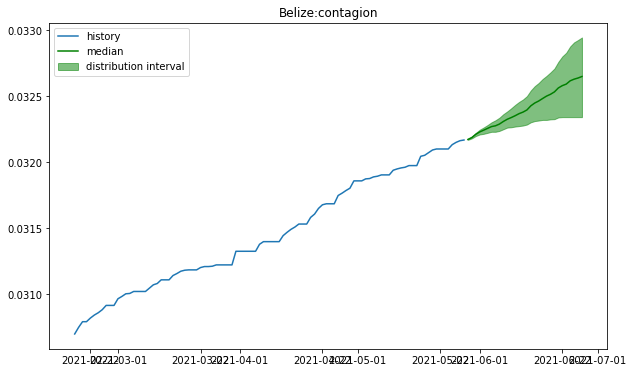

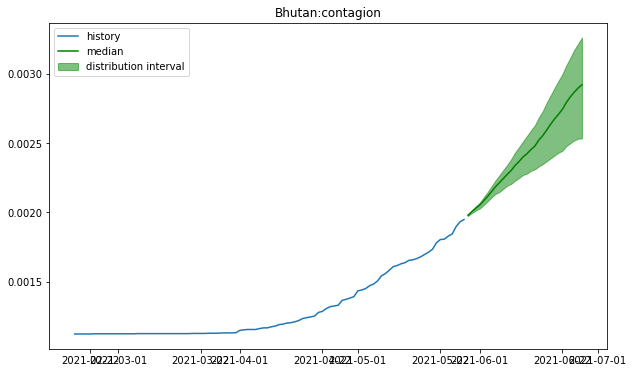

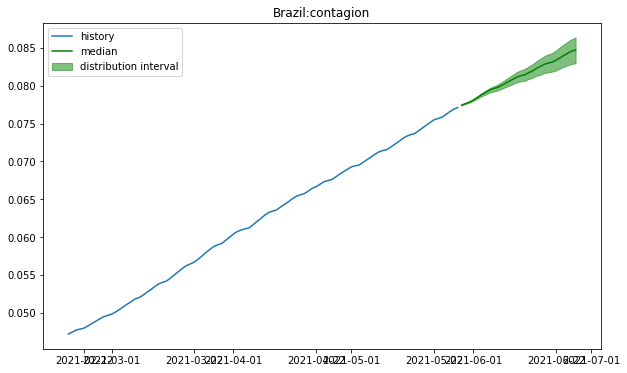

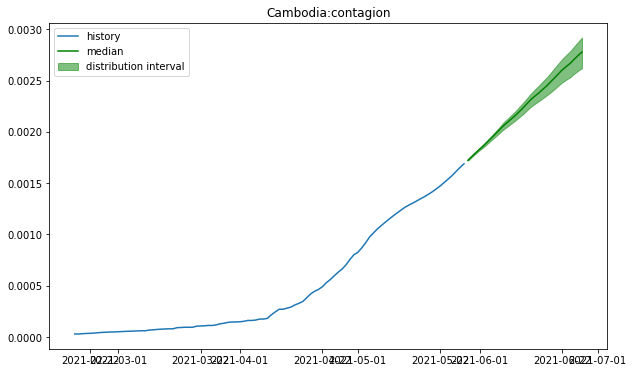

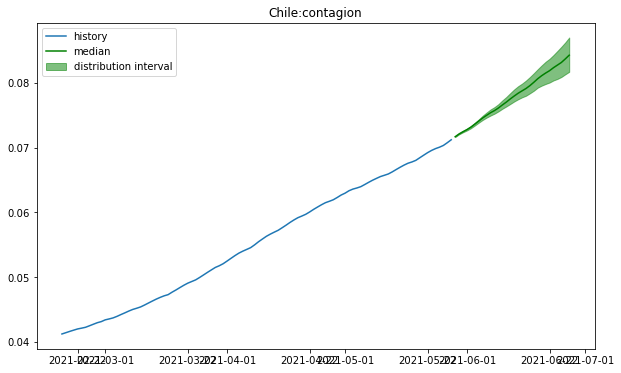

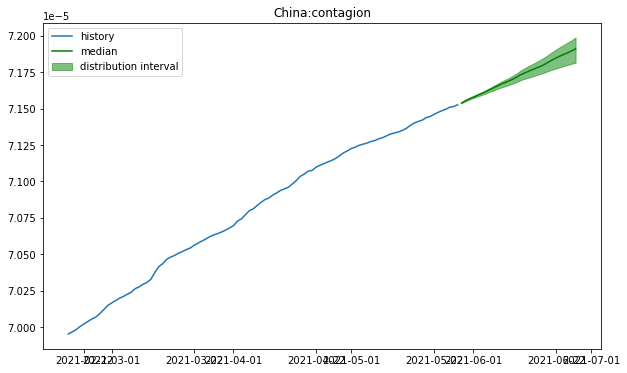

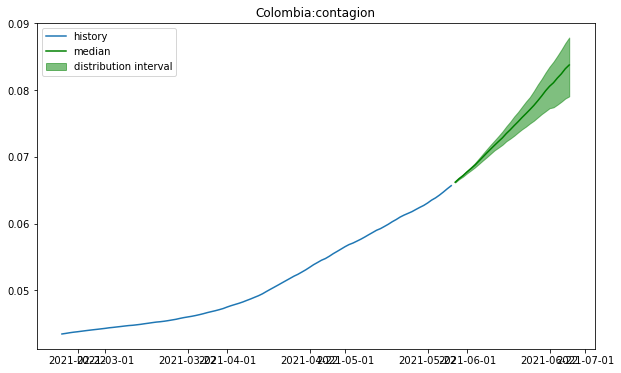

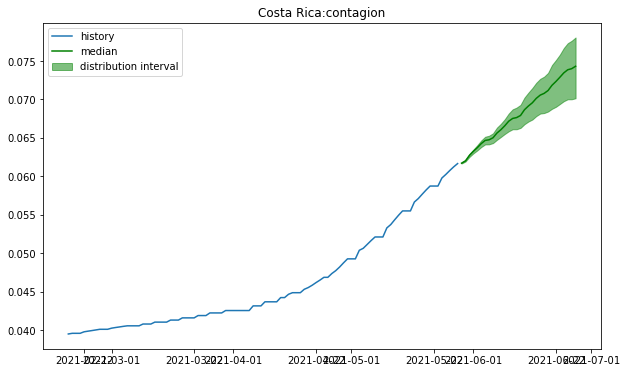

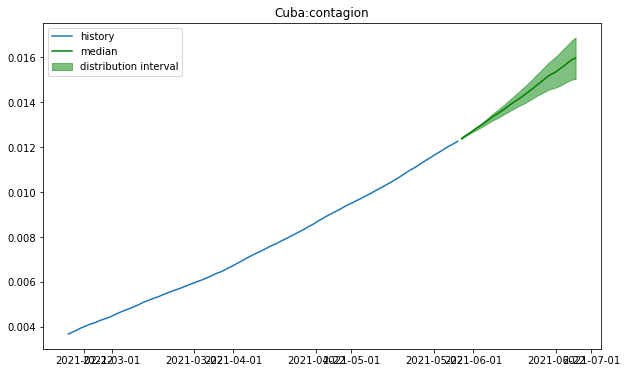

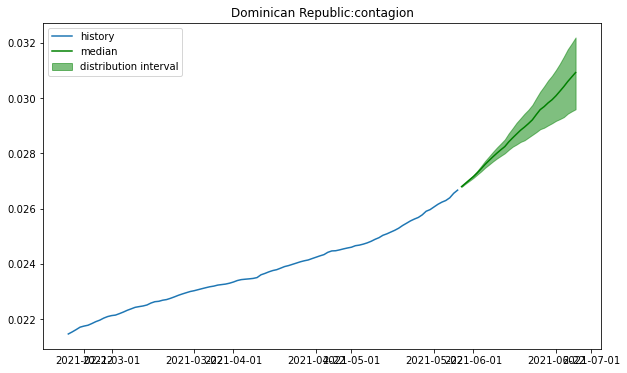

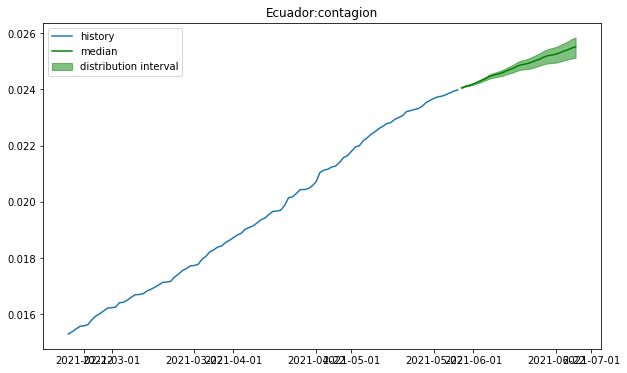

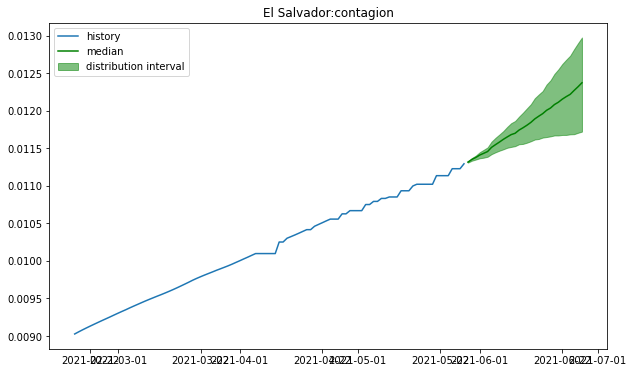

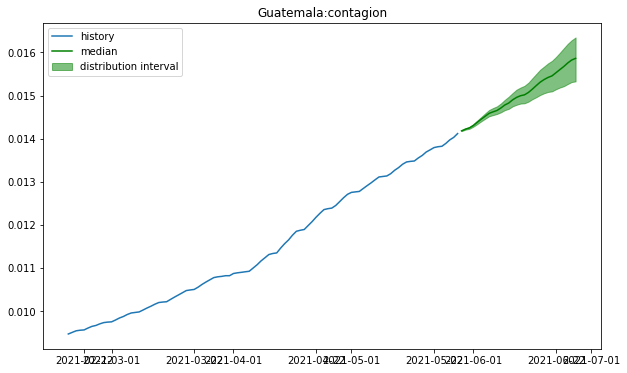

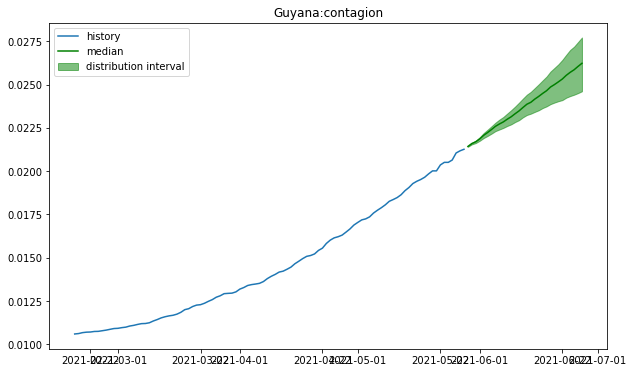

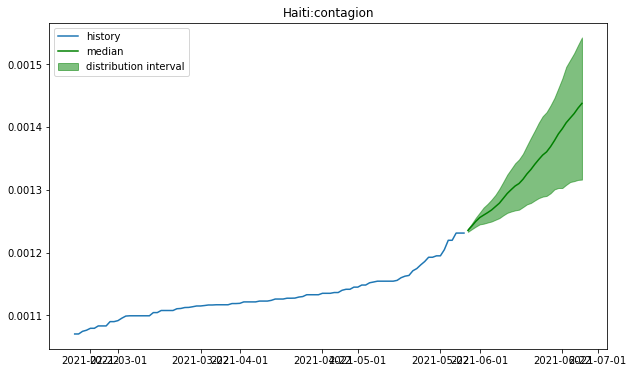

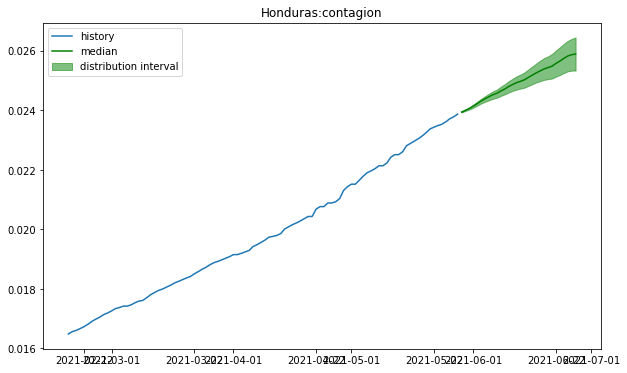

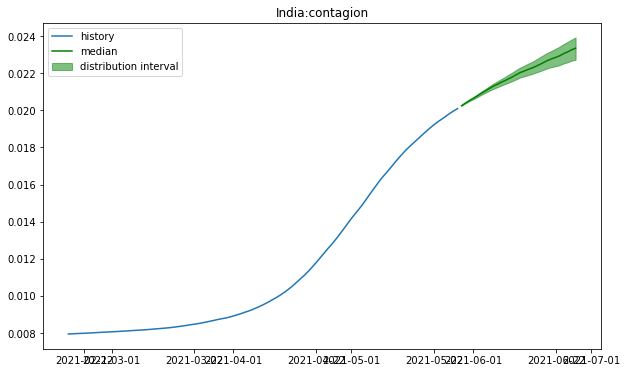

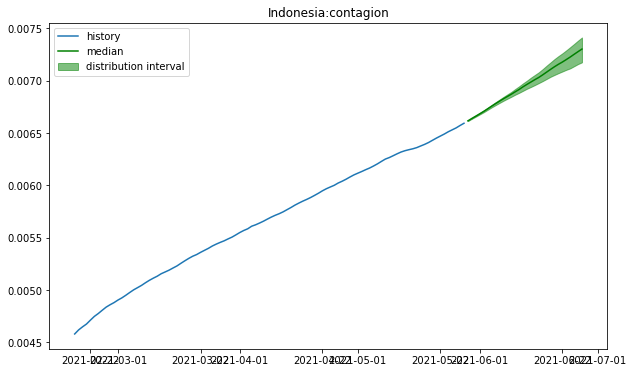

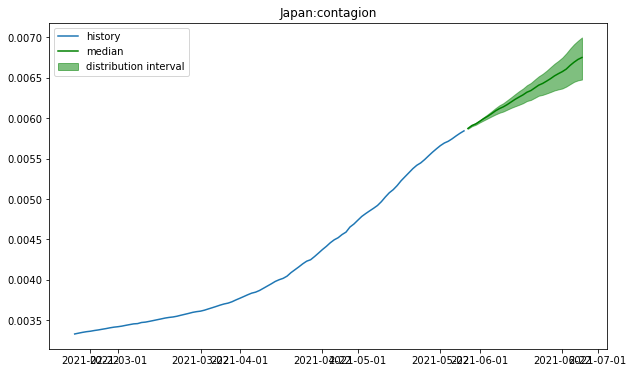

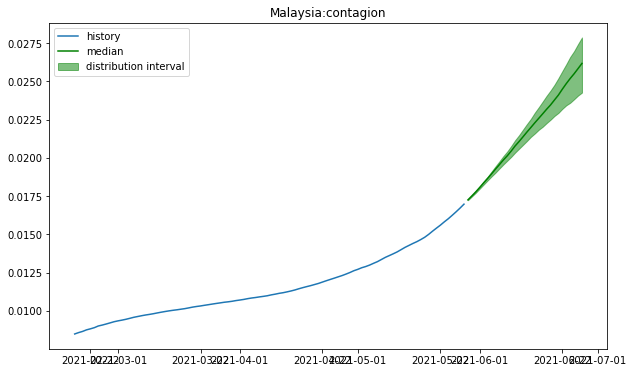

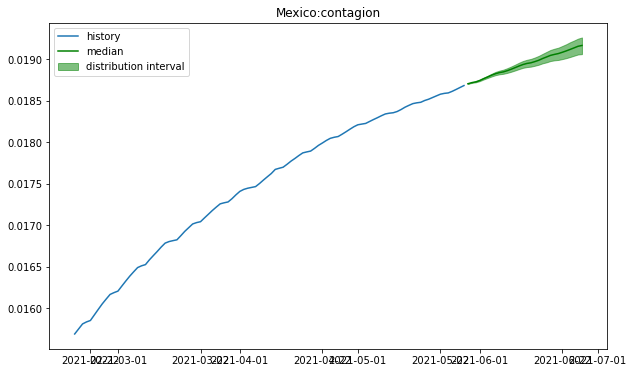

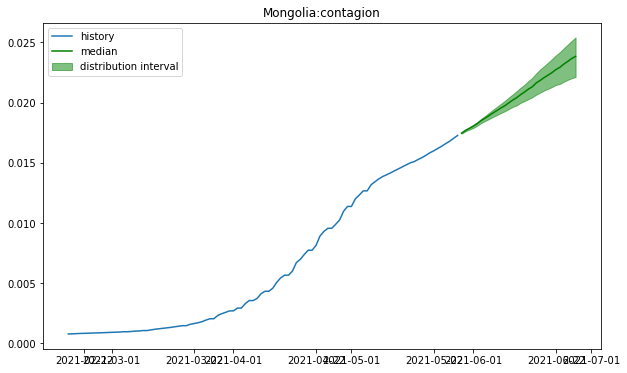

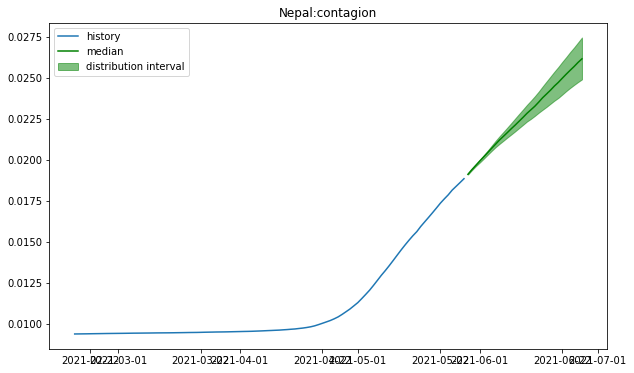

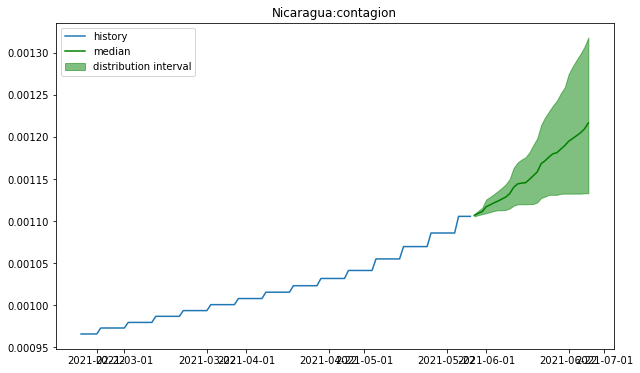

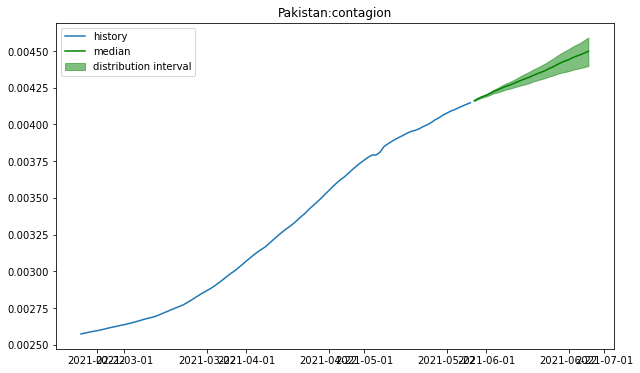

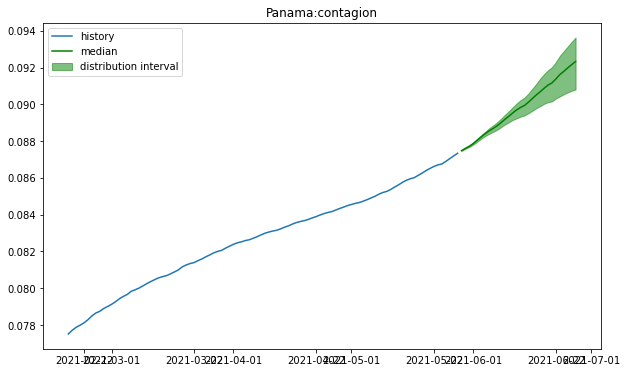

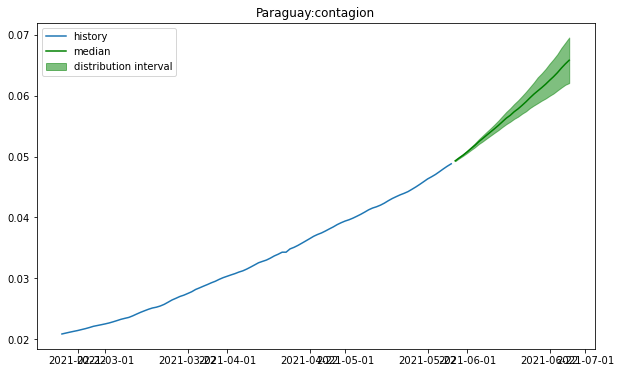

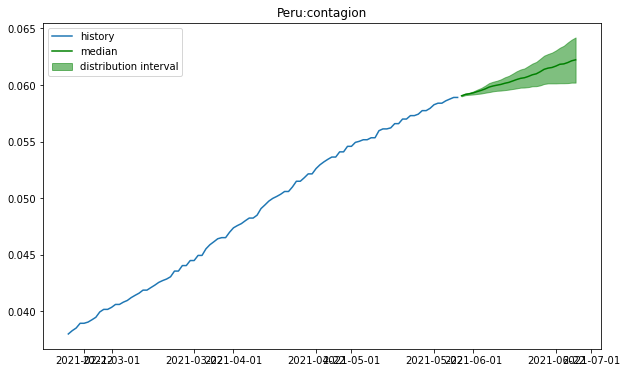

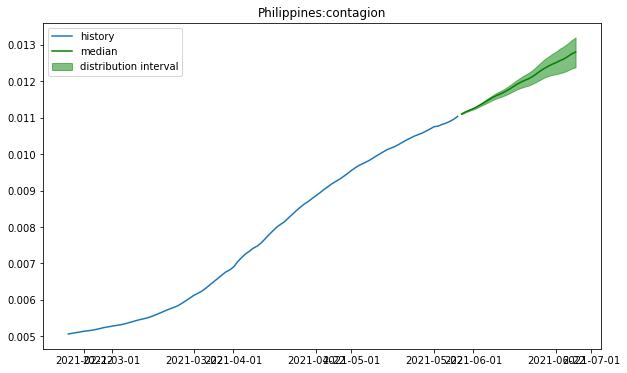

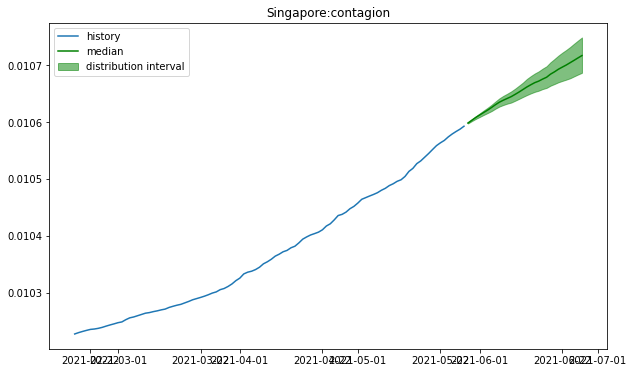

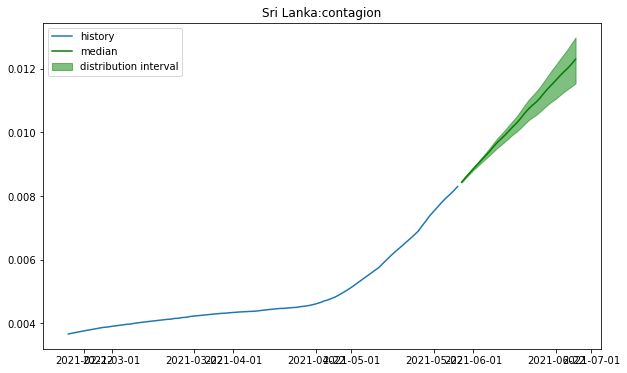

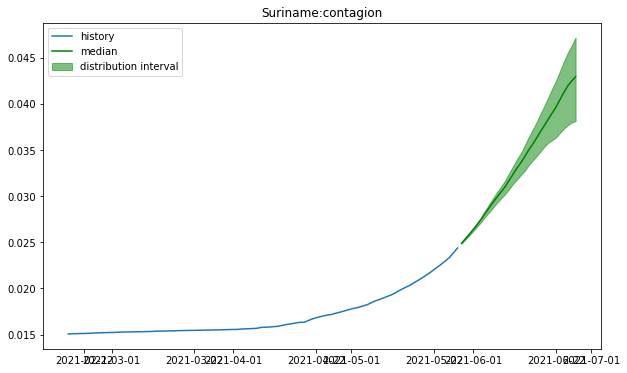

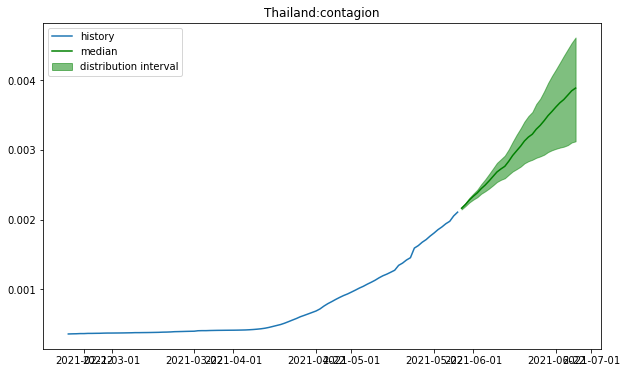

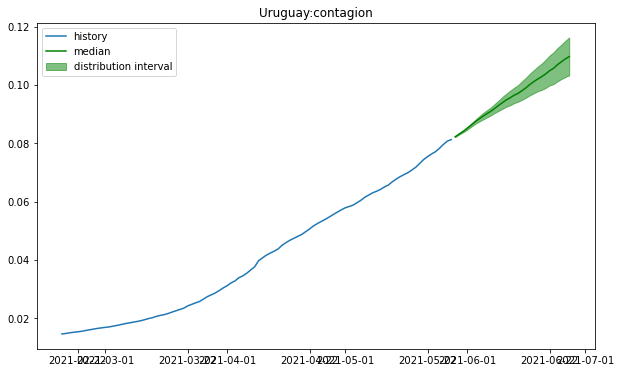

In [36]:
country = 'China'# Philippines Singapore Afghanistan  India
for country in quantile35.columns:
    color = 'green'
    plt.figure(figsize=(10,6))
    plt.plot(history[country].iloc[-100:], '-', label='history')
    plt.plot(median[country], color=color, label='median')
    # plt.plot(quantile35[country], color='b', label='lower')
    # plt.plot(quantile65[country], color='y', label='upper')
    plt.fill_between(quantile35[country].index,quantile35[country],quantile65[country],color=color, alpha=0.5, label='distribution interval')
    # plt.fill_between(quantile10[country].index,quantile10[country],quantile90[country],color=color, alpha=0.25, label='80% probability interval')
    plt.title(country + ':' + series_category)
    plt.legend(loc='upper left')
    plt.savefig('pics/' + series_category + '_prob.png', bbox_inches='tight', dpi=100)
    plt.show()

# step two

## indicator influence

In [95]:
def indicator_influence(name):
    indicator_mortality = pd.read_csv('output/step_two/indicator_influence/'+name+'.csv')
#     indicator_mortality['indicator'] = indicator_mortality.Indicator + "[" + indicator_mortality.Unit + ']'
    indicator_mortality = indicator_mortality[['Indicator', 'influence']][:29][::-1]
    plt.figure(figsize=(10,10))
    plt.barh(indicator_mortality.Indicator, indicator_mortality.influence,color='b', align='center')
    plt.title(name + ' Correlation Coefficient')
    plt.savefig('pics/' + name + '.png', bbox_inches='tight', dpi=100)
    

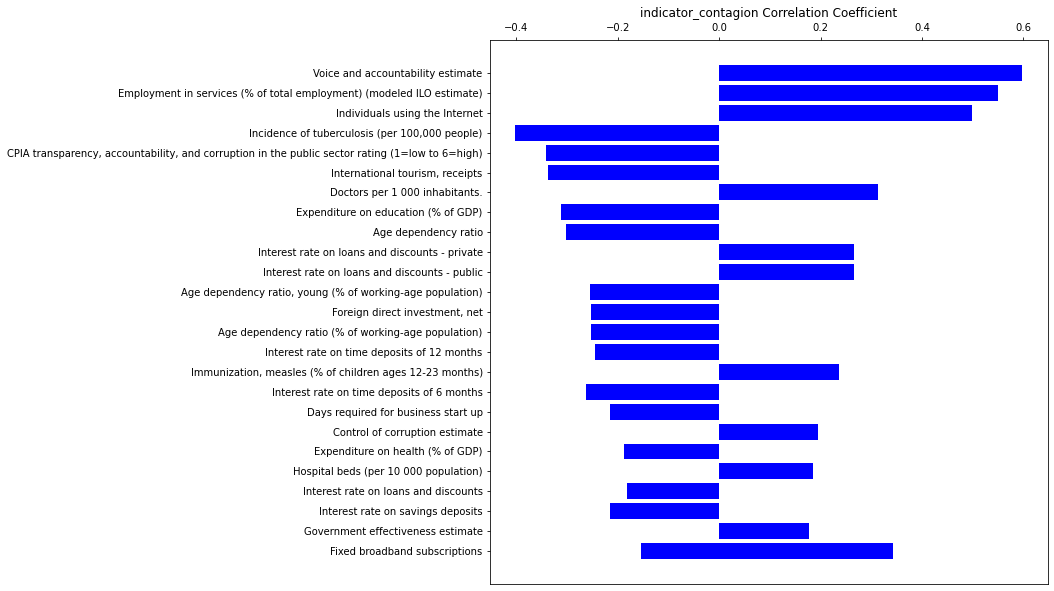

In [96]:
indicator_influence('indicator_contagion')  # indicator_mortality   indicator_recovery indicator_contagion

## policy influence

In [97]:
def policy_influence(name):
    indicator_mortality = pd.read_csv('output/step_two/policy_influence/'+name+'.csv')
#     indicator_mortality['indicator'] = indicator_mortality.Indicator + "[" + indicator_mortality.Unit + ']'
    indicator_mortality = indicator_mortality[['Policy', 'importance']][:29][::-1]
    plt.figure(figsize=(7,10))
    plt.barh(indicator_mortality.Policy, indicator_mortality.importance,color='b', align='center')
    plt.title(name + ' Importance')
    plt.savefig('pics/' + name + '.png', bbox_inches='tight', dpi=100)
    

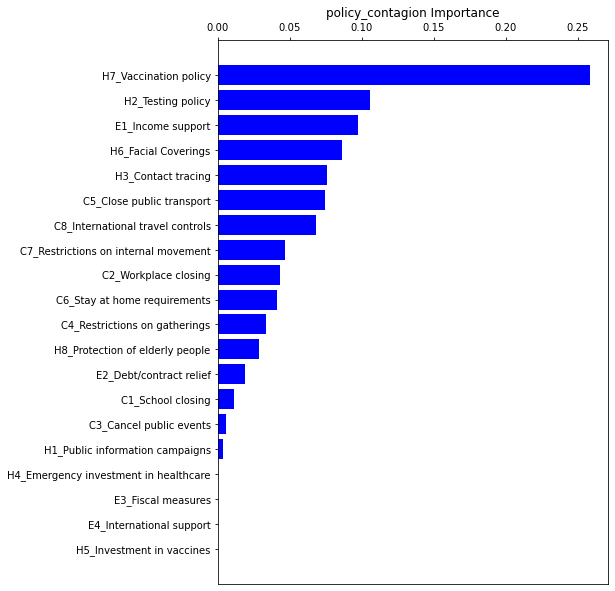

In [98]:
policy_influence('policy_contagion')  # policy_mortality  policy_recovery policy_contagion

## country policy influence

In [99]:
def country_policy_influence(name, Country):
    indicator_mortality = pd.read_csv('output/step_two/country_policy_influence/'+name+'.csv')
    indicator_mortality = indicator_mortality[indicator_mortality.Country == Country]
#     indicator_mortality['indicator'] = indicator_mortality.Indicator + "[" + indicator_mortality.Unit + ']'
    indicator_mortality = indicator_mortality[['Policy', 'importance']][:29][::-1]
    plt.figure(figsize=(10,7))
    plt.barh(indicator_mortality.Policy, indicator_mortality.importance,color='b', align='center')
    plt.title(Country + ':' + name + ' Correlation Coefficient')
    plt.savefig('pics/' + Country + '_' + name + '.png', bbox_inches='tight', dpi=100)

In [100]:
def plt_attention(A, xticks, yticks, name):
    """ Generates a heat map for the attention matrix.
    
        Args:
            A: torch.Tensor of shape (batch_size, 1, max_length, max_length)
                The attention matrix.
            xticks: list of string
                The labels to use for the x-axis ticks.
            yticks: list of string
                The labels to use for the y-axis ticks.
                
        Returns:
            None
    """
    # Sanity checks
    assert(A.shape[0] == len(xticks) and A.shape[1] == len(yticks))
    
    # Make plot bigger so its easier to read
    plt.rcParams["figure.figsize"] = 14, 8
    
    # Make x-ticks and label appear on top
    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
    
    # Plot the attention distribution
#     plt.matshow(A)
    plt.imshow(A, cmap="rainbow", interpolation="nearest")
    plt.yticks(range(len(xticks)), xticks)
    plt.xticks(range(len(yticks)), yticks, rotation=90)
    plt.colorbar()
    plt.title('Country Policy Influence:' + name)
    plt.savefig('pics/atten_'+ name +'.png', dpi=300, bbox_inches='tight')    
    plt.show()

In [101]:
def all_country_policy_influence(name):
    indicator_mortality = pd.read_csv('output/step_two/country_policy_influence/'+'policy_mortality'+'.csv')
    indicator_mortality = indicator_mortality.pivot(index='Policy', columns='Country', values='importance').fillna(0)
    plt_attention(indicator_mortality, indicator_mortality.index, indicator_mortality.columns, name)

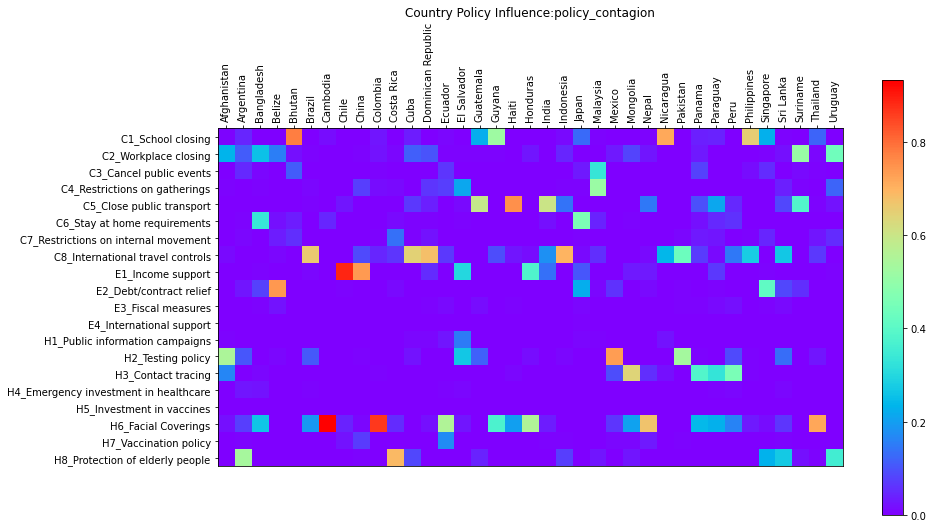

In [102]:
all_country_policy_influence('policy_contagion')  # policy_mortality  policy_recovery policy_contagion

In [103]:
# country_policy_influence('policy_mortality', 'Philippines')  # policy_mortality  policy_recovery

## policy indicator

In [104]:
def plt_attention_2(A, xticks, yticks, name):
    """ Generates a heat map for the attention matrix.
    
        Args:
            A: torch.Tensor of shape (batch_size, 1, max_length, max_length)
                The attention matrix.
            xticks: list of string
                The labels to use for the x-axis ticks.
            yticks: list of string
                The labels to use for the y-axis ticks.
                
        Returns:
            None
    """
    # Sanity checks
    assert(A.shape[0] == len(xticks) and A.shape[1] == len(yticks))
    
    # Make plot bigger so its easier to read
    plt.rcParams["figure.figsize"] = 18, 11
    
    # Make x-ticks and label appear on top
    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
    
    # Plot the attention distribution
#     plt.matshow(A)
    plt.imshow(A, cmap="rainbow", interpolation="nearest")
    plt.yticks(range(len(xticks)), xticks)
    plt.xticks(range(len(yticks)), yticks, rotation=90)
    plt.colorbar()
    plt.title('Policy Indicator')
    plt.savefig('pics/atten_'+ name +'.png', dpi=300, bbox_inches='tight')    
    plt.show()

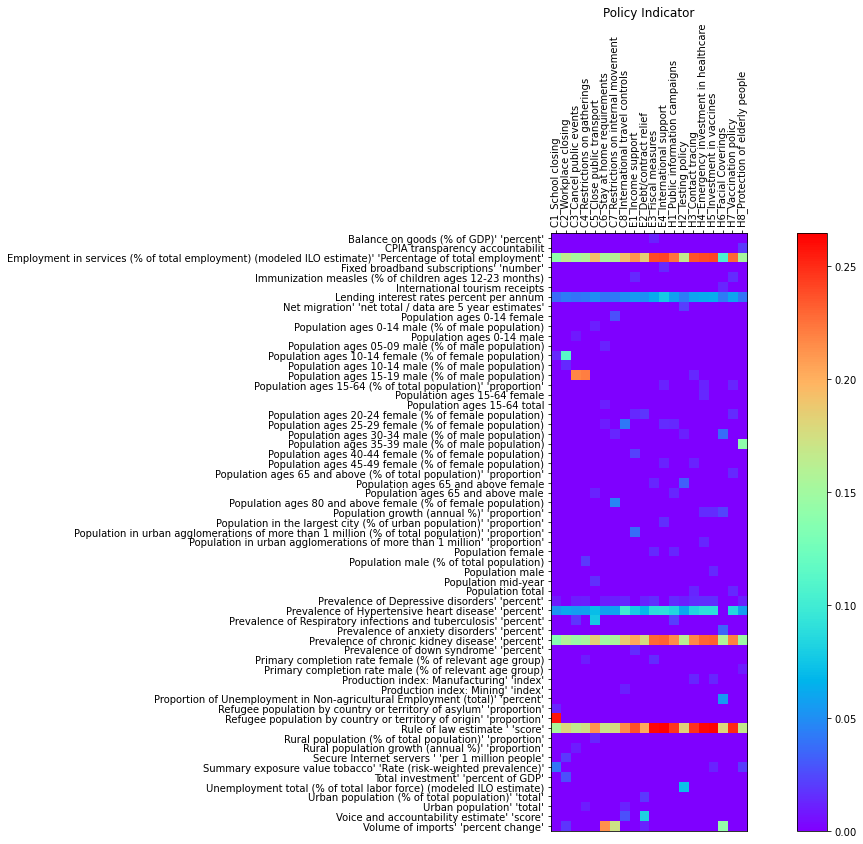

In [105]:
policy_indicator = pd.read_csv('output/step_two/policy_indicator.csv')
policy_indicator = policy_indicator.pivot(index='Indicator', columns='Policy', values='importance').fillna(0)
plt_attention_2(policy_indicator, [''.join(x.split(',')[:2])[2:-1] for x in policy_indicator.index], policy_indicator.columns, 'policy_indicator')

# Step three

In [106]:
# 'confirmed', 'deaths', 'recovery', 'recovery', 'mortality', 'contagion'
series_category = 'contagion'
history = pd.read_csv('output/step_three/'+series_category+'/' + 'history.csv', index_col=0)
median = pd.read_csv('output/step_three/'+series_category+'/' + 'prediction.csv', index_col=0)

history.index = pd.to_datetime(history.index)
median.index = pd.to_datetime(median.index)


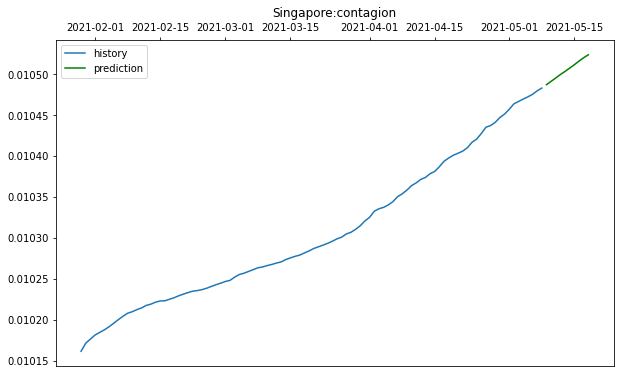

In [107]:
country = 'Singapore'# 'Philippines'
color = 'green'
plt.figure(figsize=(10,6))

plt.plot(history[country].iloc[-100:], '-', label='history')
plt.plot(median[country], color=color, label='prediction')


plt.title(country + ':' + series_category)
plt.legend(loc='upper left')
plt.savefig('pics/' + series_category + '.png', bbox_inches='tight', dpi=100)
plt.show()

In [3]:
indicator_year, population_year = 2019, 2020
target = 'contagion'
series_category = 'confirmed'

In [4]:
target = 'mortality'
series_category = 'deaths'

In [5]:
confirmed = pd.read_csv('raw_data/COVID/time_series_covid19_confirmed_global.csv')
confirmed_series = confirmed.groupby('Country/Region').sum().drop(['Lat', 'Long'], axis=1).T.fillna(0)
confirmed_series.index = pd.to_datetime(confirmed_series.index)

series = pd.read_csv('raw_data/COVID/time_series_covid19_' + series_category + '_global.csv')
process_series = series.groupby('Country/Region').sum().drop(['Lat', 'Long'], axis=1).T.fillna(0)
process_series.index = pd.to_datetime(process_series.index)
intersection_country = list(set(process_series.columns).intersection(confirmed_series.columns))
target_series = process_series[intersection_country] / confirmed_series[intersection_country]
target_series.to_csv('raw_data/COVID/time_series_covid19_' + target + '_global.csv')